# BIG DATA MART ASSIGNMENT

## Introduction

### Big datamart dataset is all about understanding the sales volume from different mall outlets. The data contains various information(features) like Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type with the help of these features we will find out which features help to increase Item_Outlet_Sales(label).

## Libraries

In [6]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing and normalizing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# metrics

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


## Loading the Dataset both Train and test.

In [8]:
train_data = pd.read_csv('bigdatamart_Train.csv')
test_data = pd.read_csv('bigdatamart_Test.csv')

In [9]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### From train_data we have various features which will help us to traget sales
### From test_data we have various features but there is no information in sales columns.
### From both test_data and train_data we can find out that there is missing data in outlet size, item weight features.

# EDA - Exploratory Data Analysis

In [11]:
train_data['source'] = 'train'
test_data['source'] = 'test'
data = pd.concat([train_data,test_data],ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### We have merge both the dataset for visualization purpose.

In [12]:
train_data.shape

(8523, 13)

### There are 8523 rows and 13 columns. All 12 rows are features and only item_outlet_sales is our target label.

In [13]:
# checking columns types and null values

pd.set_option('display.max_rows',None)
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

### 1.From the above table we can find out that there are float, integers and object in dataset. In features item weight  and outlet size  sales there are missing values as well. 
### 2.Removing the null values from the dataset through mean and mode.There were 2410 null values in outlet_size and 1463 null values in Item_Weight cloumns.

In [14]:
# fill the null values

train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

### filling up the null values for item weight and outlet size columns with the help of mean and mode.

In [15]:
# removing the duplicates

train_data.drop_duplicates(inplace = True)
train_data.shape

(8523, 13)

### From the observation we can find out that there is no duplicates data in dataset as the total numbers of rows and columns still the same(8523,13)

In [16]:
# using label encoder

le = LabelEncoder()
train_data = train_data.apply(le.fit_transform)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,284,1,664,4,5592,9,4,1,0,1,2540,0
1,8,57,2,880,14,473,3,8,1,2,2,422,0
2,662,376,1,715,10,2901,9,4,1,0,1,1639,0
3,1121,393,2,0,6,4227,0,3,1,2,0,670,0
4,1297,265,1,0,9,627,1,1,0,2,1,865,0


### With the help of label encoder we have converted all the objects into integers.

In [17]:
train_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.0
mean,779.714889,298.756776,1.369354,3709.198639,7.226681,2941.096562,4.722281,3.790684,1.170832,1.112871,1.201220,1523.114279,0.0
std,449.222377,95.451067,0.644810,2396.606857,4.209990,1675.483234,2.837201,2.730322,0.600327,0.812757,0.796459,918.266722,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,395.500000,285.000000,1.000000,1595.500000,4.000000,1535.500000,2.000000,1.000000,1.000000,0.000000,1.000000,749.500000,0.0
50%,783.000000,326.000000,1.000000,3708.000000,6.000000,2949.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1432.000000,0.0
75%,1167.000000,361.000000,2.000000,5789.500000,10.000000,4351.500000,7.000000,6.000000,2.000000,2.000000,1.000000,2229.000000,0.0
max,1558.000000,415.000000,4.000000,7879.000000,15.000000,5937.000000,9.000000,8.000000,2.000000,2.000000,3.000000,3492.000000,0.0


### From the above table we can find out that min row have zero value.
### In few columns there are skweness as well.
### There is no missing values in the dataset.

In [18]:
# replacing all the zero values 

train_data['Item_Weight'] = train_data['Item_Weight'].replace(0,train_data['Item_Weight'].mean())
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(0,train_data['Item_Fat_Content'].mode()[0])
train_data['Item_Weight'] = train_data['Item_Weight'].replace(0,train_data['Item_Weight'].mean())
train_data['Item_Type'] = train_data['Item_Type'].replace(0,train_data['Item_Type'].mode()[0])
train_data['Item_MRP'] = train_data['Item_MRP'].replace(0,train_data['Item_MRP'].mean())
train_data['Outlet_Establishment_Year'] = train_data['Outlet_Establishment_Year'].replace(0,train_data['Outlet_Establishment_Year'].mean())
train_data['Outlet_Size'] = train_data['Outlet_Size'].replace(0,train_data['Outlet_Size'].mode()[0])
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].replace(0,train_data['Outlet_Location_Type'].mode()[0])
train_data['Outlet_Type'] = train_data['Outlet_Type'].replace(0,train_data['Outlet_Type'].mode()[0])
train_data['Item_Identifier'] = train_data['Item_Identifier'].replace(0,train_data['Item_Identifier'].mean())
train_data['Item_Visibility'] = train_data['Item_Visibility'].replace(0,train_data['Item_Visibility'].mean())
train_data['Outlet_Identifier'] = train_data['Outlet_Identifier'].replace(0,train_data['Outlet_Identifier'].mode()[0])
train_data['Item_Outlet_Sales'] = train_data['Item_Outlet_Sales'].replace(0,train_data['Item_Outlet_Sales'].mean())

### Replacing all the zero value data by mean and mode so that there will be no zero value data.

In [19]:
train_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.0
mean,780.263791,298.896988,1.406430,3938.113163,7.682858,2941.441640,5.047870,4.441367,1.280183,1.673237,1.328288,1523.471692,0.0
std,448.745368,95.231257,0.591551,2200.483434,3.695836,1675.180266,2.548807,2.136445,0.449115,0.469057,0.663305,917.970152,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,397.000000,285.000000,1.000000,2121.500000,5.000000,1536.500000,3.000000,3.000000,1.000000,1.000000,1.000000,750.000000,0.0
50%,783.000000,326.000000,1.000000,3709.198639,6.000000,2949.000000,5.000000,4.000000,1.000000,2.000000,1.000000,1432.000000,0.0
75%,1167.000000,361.000000,2.000000,5789.500000,10.000000,4351.500000,7.000000,6.000000,2.000000,2.000000,1.000000,2229.000000,0.0
max,1558.000000,415.000000,4.000000,7879.000000,15.000000,5937.000000,9.000000,8.000000,2.000000,2.000000,3.000000,3492.000000,0.0


### From the above table we can easily find out that all the zero values in min row is removed with the help of mean and mode. 

## Distribution plot

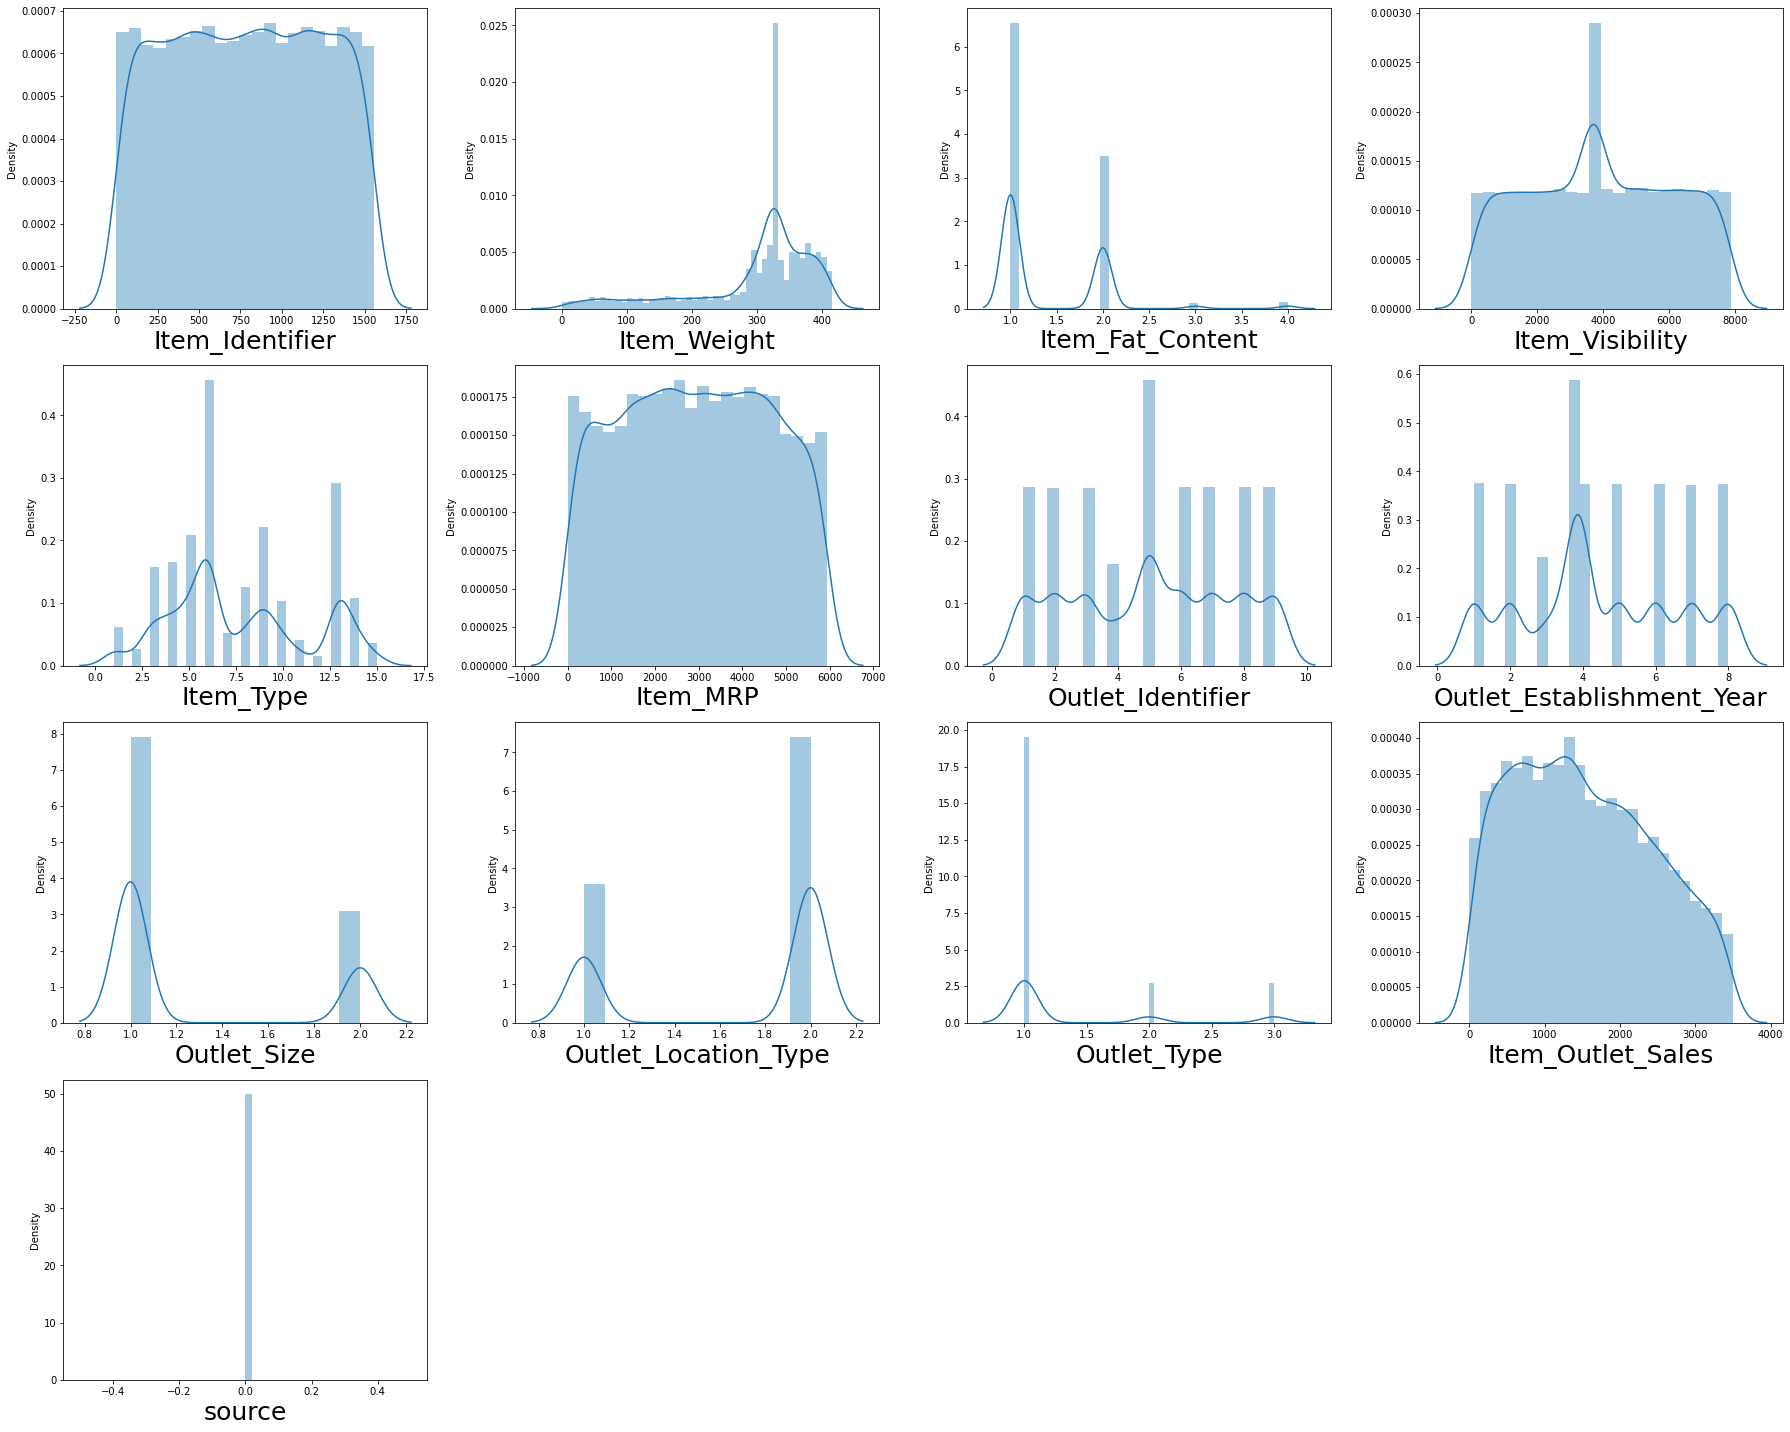

In [20]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in train_data:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(train_data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

### From the above plot we can see that most of the features are categorical data but we can see item weight do have skewness in it.

## Z Score

In [21]:
# finding out the z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(train_data))
print(z)

[[1.39121306e+00 1.56438781e-01 6.87097746e-01 ... 4.94957260e-01
  1.10743029e+00            nan]
 [1.72104083e+00 2.54024978e+00 1.00347214e+00 ... 1.01273421e+00
  1.19996964e+00            nan]
 [2.63558663e-01 8.09687261e-01 6.87097746e-01 ... 4.94957260e-01
  1.25859306e-01            nan]
 ...
 [1.28529471e+00 1.08176913e-03 6.87097746e-01 ... 4.94957260e-01
  5.50672968e-01            nan]
 [2.21215909e-01 1.57412373e+00 1.00347214e+00 ... 1.01273421e+00
  6.26110375e-02            nan]
 [1.62744106e+00 5.05147530e-01 6.87097746e-01 ... 4.94957260e-01
  9.00378056e-01            nan]]


In [22]:
print(np.where(z > 3)[0])
print(np.where(z > 3)[1])

[  81  151  199  220  339  396  489  599  615  667  727  733  734  753
  838  885  891  966 1010 1034 1082 1090 1124 1133 1183 1192 1209 1242
 1291 1372 1412 1433 1494 1500 1512 1515 1537 1542 1549 1576 1615 1617
 1684 1723 1753 1769 1943 2062 2111 2143 2168 2173 2198 2223 2254 2331
 2373 2438 2552 2569 2660 2678 2720 2743 2746 2905 2971 2973 3011 3051
 3077 3132 3202 3225 3241 3242 3243 3335 3367 3396 3476 3480 3491 3509
 3545 3582 3602 3633 3687 3805 4019 4021 4083 4163 4245 4275 4290 4348
 4393 4415 4463 4606 4615 4640 4680 4865 5047 5054 5133 5146 5202 5401
 5415 5417 5467 5493 5514 5539 5563 5577 5595 5611 5633 5784 5915 6132
 6176 6252 6268 6274 6335 6344 6357 6370 6432 6462 6468 6486 6540 6669
 6729 6803 6843 7001 7009 7146 7147 7163 7200 7308 7318 7353 7471 7496
 7535 7559 7568 7667 7693 7703 7712 7722 7745 7751 7910 7944 7976 7984
 8004 8085 8143 8219 8233 8387 8517]
[2 2 2 1 2 2 2 1 2 1 2 1 1 2 2 1 2 1 2 2 1 2 2 2 2 1 2 1 1 2 1 2 1 1 2 1 1
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1

In [23]:
index = (np.where(z > 3)[0])

In [24]:
train_data = train_data.drop(train_data.index[index])
train_data.shape

(8348, 13)

### Used the z score method to remove skewness from different features. Now there are 8348 rows and 13 colums. It means skewness is removed.

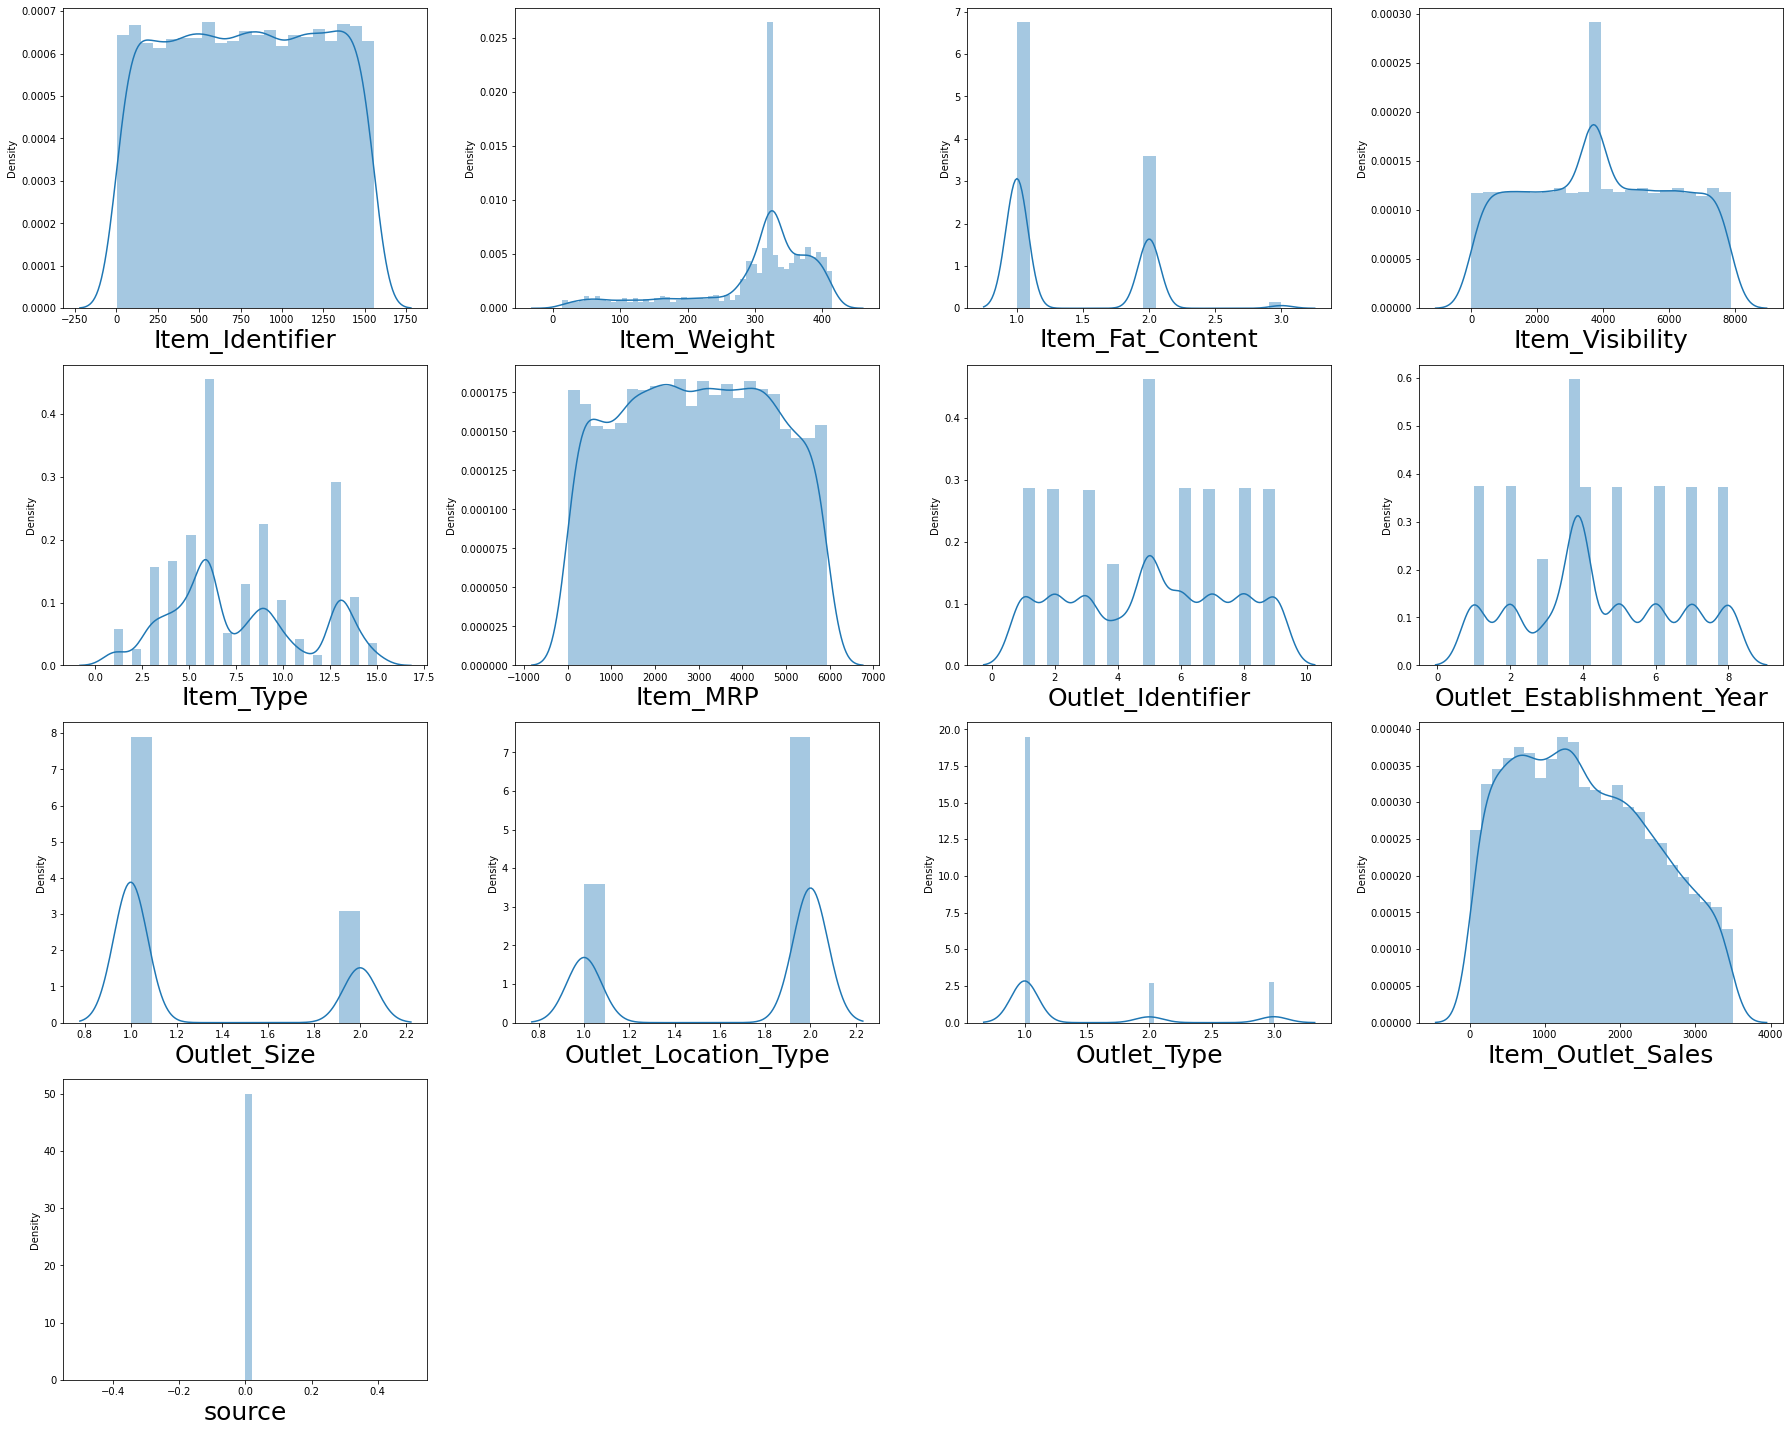

In [25]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in train_data:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(train_data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

### Using the distribution plot to see how data is distributed after skewness is removed.

## Count plot

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

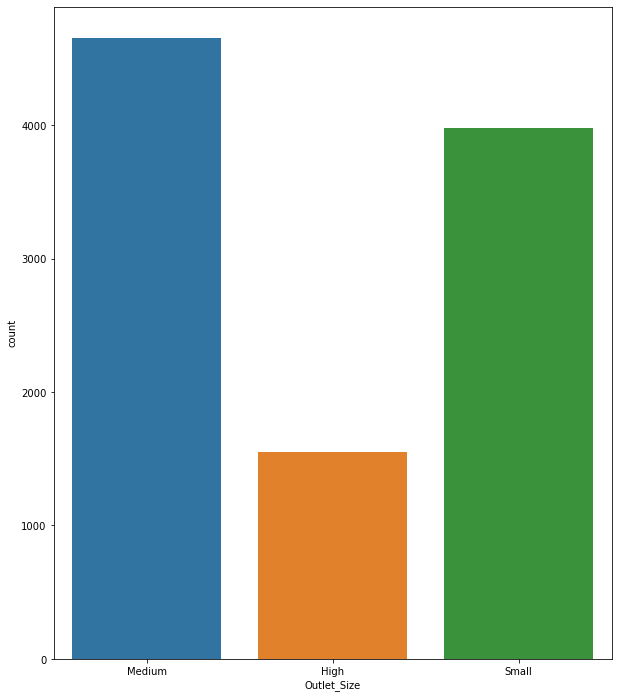

In [26]:
plt.figure(figsize=(10,12), facecolor='white')
sns.countplot(data.Outlet_Size)

In [27]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

### From the above count plot we can see that small outlets is 3980, medium outlets is 4655 and high outlets is 1553. so we can say that more numbers of sale take place in medium outlet.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

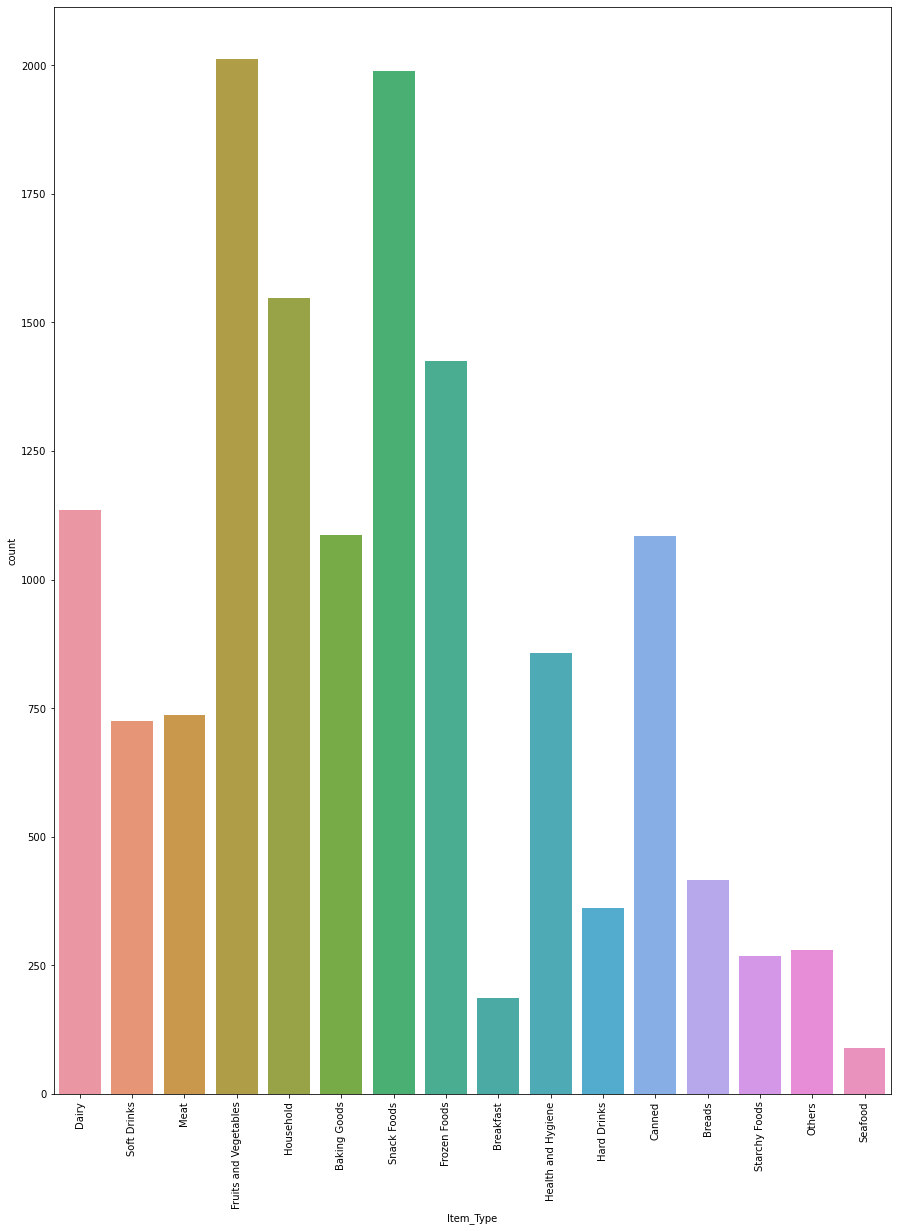

In [28]:
plt.figure(figsize=(15,20), facecolor='white')
sns.countplot(data.Item_Type)
plt.xticks(rotation=90)

In [29]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

### From the above count plot we can see that fruit and vegetable sales are frequent in sales. Its means fruits and vegetables play vital role in increasing sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

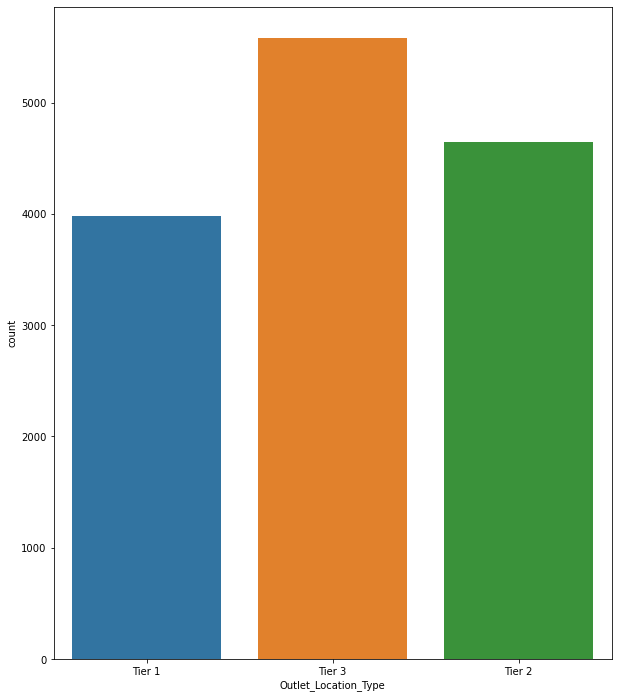

In [30]:
plt.figure(figsize=(10,12), facecolor='white')
sns.countplot(data.Outlet_Location_Type)

In [31]:
data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

### From the above count plot we can find out that Tier 3 cities have more number of counts so naturally the contribution to sales is high from tier 3 cities.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

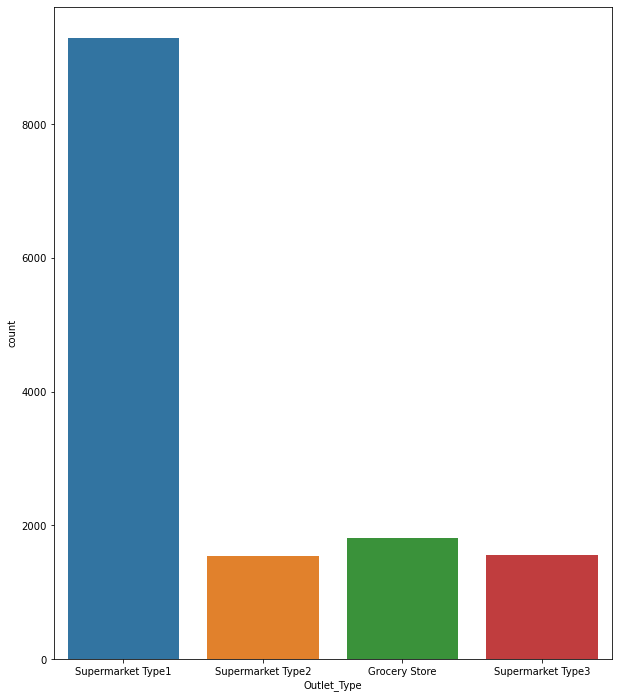

In [33]:
plt.figure(figsize=(10,12), facecolor='white')
sns.countplot(data.Outlet_Type)

In [34]:
data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

### The supermarket type1 has more number of outlets so sales must be high from supermarket type1.

In [35]:
# dividing features and label

x = train_data.drop('Item_Outlet_Sales',axis=1)
y = train_data.Item_Outlet_Sales

### dividing all the features and label to x and y for model building

In [36]:
# standard scaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-1.39050746, -0.18332765, -0.72615249, ...,  0.69576497,
        -0.4965577 ,  0.        ],
       [-1.71940656, -2.63965045,  1.23499956, ...,  0.69576497,
         1.00426189,  0.        ],
       [-0.26602814,  0.81218643, -0.72615249, ...,  0.69576497,
        -0.4965577 ,  0.        ],
       ...,
       [ 1.27846422, -0.02101557, -0.72615249, ..., -1.43726696,
        -0.4965577 ,  0.        ],
       [-0.2238046 , -1.64413636,  1.23499956, ...,  0.69576497,
         1.00426189,  0.        ],
       [-1.62607033,  0.49838308, -0.72615249, ...,  0.69576497,
        -0.4965577 ,  0.        ]])

### Using the standard scaler method to bring all the data in same range for model prediction

## VIF variance inflation factor

In [37]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.015403,Item_Identifier
1,1.011017,Item_Weight
2,1.029204,Item_Fat_Content
3,1.017343,Item_Visibility
4,1.016334,Item_Type
5,1.001343,Item_MRP
6,1.125525,Outlet_Identifier
7,1.682185,Outlet_Establishment_Year
8,1.218631,Outlet_Size
9,1.836483,Outlet_Location_Type


### from vif score i have tried to find out which features are strongly related to each other. However there is no vif score above 5 so we are good to with all the features.

In [38]:
# drop the source colums

train_data.drop('source', axis=1, inplace=True)

### we have dropped the source columns as there is no data in it. It is least important for model building.

## Model Building

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 370)

## LinearRegression

In [90]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [91]:
# adjusted r2 score
rg.score(x_train,y_train)

0.47449105176711825

In [92]:
rg.score(x_test,y_test)

0.47558283226313836

In [93]:
y_pred = rg.predict(x_test)

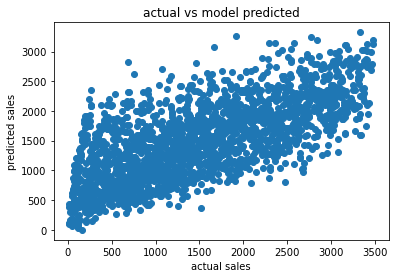

In [94]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('actual vs model predicted')
plt.show()

### LinearRegression - 47.5%

## RandomForestRegressor

In [40]:
rf = RandomForestRegressor(n_estimators=100,)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
output = rf.predict(x_test)

In [42]:
from sklearn import metrics
r_square = metrics.r2_score(y_test,output)
r_square

0.6204992566224069

### Random Forest Regressor - 62.0%

## DecisionTreeRegressor

In [145]:
dt = DecisionTreeRegressor(random_state = 200)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=200)

In [146]:
output1 = dt.predict(x_test)

In [147]:
from sklearn import metrics
r_square = metrics.r2_score(y_test,output1)
r_square

0.3002066624342773

### Decision Tree Regressor - 30%

# Conclusion

### According to the above 3 model prediction the best model is Random Forest Regressor - 61.7%

# Saving the model

In [44]:
import pickle

In [45]:
# saving the Random Forest Regressor model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))